# Анализ данных о популярности ресторанов

## Тема проекта

Исследование факторов, влияющих на популярность ресторанов в Нью-Йорке

## Dataset

https://www.kaggle.com/datasets/new-york-city/nyc-inspections 

## Выполнил

Никишин Владимир Игоревич

## Предобработка данных

In [1]:
# Импорт библиотек

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from folium.plugins import MarkerCluster

In [2]:
# Быстрый взгляд на датасет
df = pd.read_csv('Restaurants.csv')
df.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection


In [3]:
print(len(df))
print(len(df.drop_duplicates()))

399918
399907


Как видим есть дубликаты, удалим ненужные строки, а также сделаем названия столбцов в нижнем регистре для удобства.


In [4]:
df = df.drop_duplicates()
df.columns = map(str.lower, df.columns)

Посмотрим на типы данных

In [5]:
df.dtypes

camis                      int64
dba                       object
boro                      object
building                  object
street                    object
zipcode                  float64
phone                     object
cuisine description       object
inspection date           object
action                    object
violation code            object
violation description     object
critical flag             object
score                    float64
grade                     object
grade date                object
record date               object
inspection type           object
dtype: object

Поменяем тип данных, там где дана дата и время

In [6]:
df['inspection date'] = pd.to_datetime(df['inspection date'])
df['record date'] = pd.to_datetime(df['record date'])
df.dtypes

camis                             int64
dba                              object
boro                             object
building                         object
street                           object
zipcode                         float64
phone                            object
cuisine description              object
inspection date          datetime64[ns]
action                           object
violation code                   object
violation description            object
critical flag                    object
score                           float64
grade                            object
grade date                       object
record date              datetime64[ns]
inspection type                  object
dtype: object

В процессе моей работы над анализом данных, выяснилось, что в датасете присутствуют мешающие данные (якобы за 1900 год), никакого смысла в них нет, так что предлагаю от них избавиться.

In [7]:
df[df['boro'] =='Missing'].head(3)

,camis,dba,boro,building,street,zipcode,phone,cuisine description,inspection date,action,violation code,violation description,critical flag,score,grade,grade date,record date,inspection type
12159,50064055,ANAND RESTAURANT,Missing,NaN,NaN,NaN,2126500333,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,2017-08-28,NaN
66079,50064334,NaN,Missing,NaN,NaN,NaN,3476800933,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,2017-08-28,NaN
88196,50066834,VOULA RESTAURANT,Missing,NaN,NaN,NaN,6463181871,Other,1900-01-01,NaN,NaN,NaN,Not Applicable,NaN,NaN,NaN,2017-08-28,NaN


In [8]:
df = df[df['boro'] != 'Missing']

Также для удобства изменим название одной из тип кухни:

In [9]:
df['cuisine description'] = df['cuisine description'].replace({'Latin (Cuban, Dominican, Puerto Rican, South & Central American)': 'Latin'})

# Задания на визуализацию

## 1


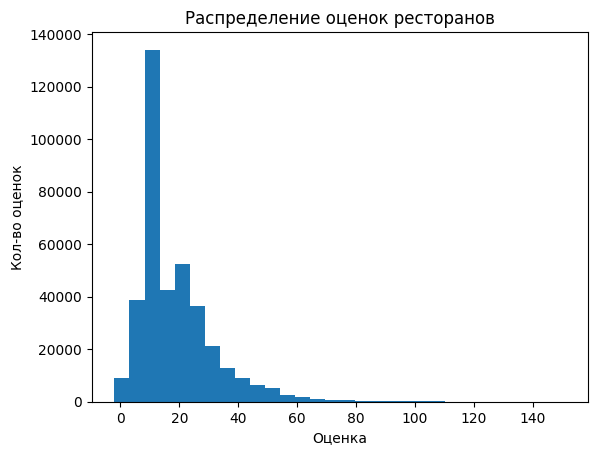

In [10]:
# Выборка 1: Постройте гистограмму распределения оценок ресторанов.

# Построение гистограммы
plt.hist(df['score'], bins=30)
plt.xlabel('Оценка')
plt.ylabel('Кол-во оценок')
plt.title('Распределение оценок ресторанов')
plt.show()


## 2



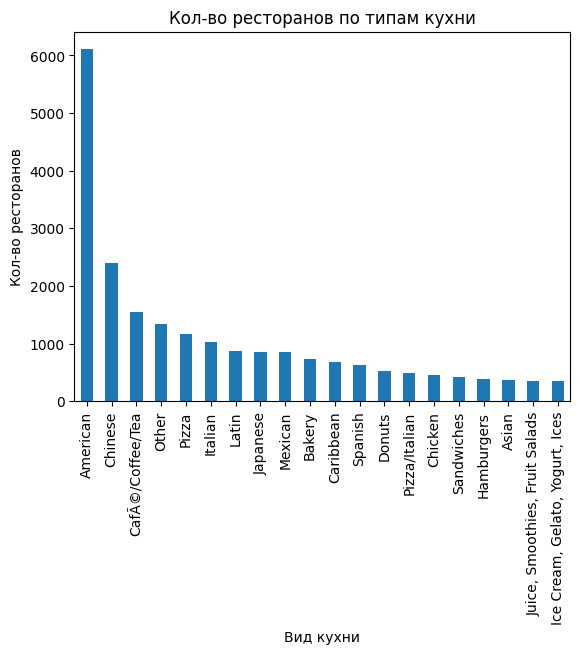

In [11]:
# Выборка 2: С помощью диаграммы столбцов сравните количество ресторанов по типам кухни.

# Кол-во ресторанов по кухням
cuisine_counts = df.groupby(['cuisine description'])['camis'].nunique()
cuisine_counts = cuisine_counts.sort_values(ascending=False).head(20)

# Построение диаграммы столбцов
cuisine_counts.plot(kind='bar')
plt.xlabel('Вид кухни')
plt.ylabel('Кол-во ресторанов')
plt.title('Кол-во ресторанов по типам кухни')
plt.show()


## 3


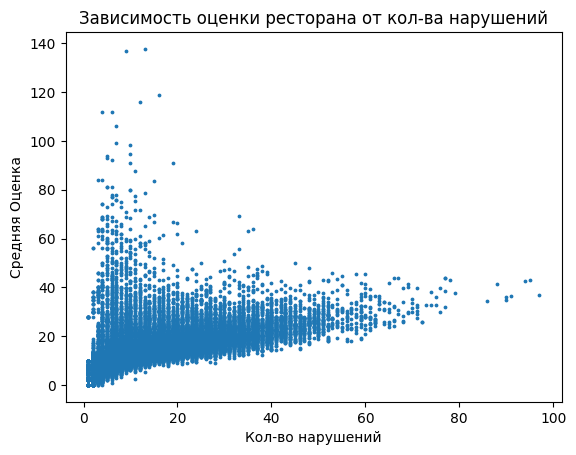

In [12]:
# Выборка 3: Создайте scatter plot зависимости оценки ресторана от количества нарушений.

# Группировка значений
violation_count = df.groupby(['camis']).agg({'score':'mean', 'critical flag':'count'})

# Построение scatter plot
plt.scatter(violation_count['critical flag'], violation_count['score'], s=3)
plt.xlabel('Кол-во нарушений')
plt.ylabel('Средняя Оценка')
plt.title('Зависимость оценки ресторана от кол-ва нарушений')
plt.show()


## 4


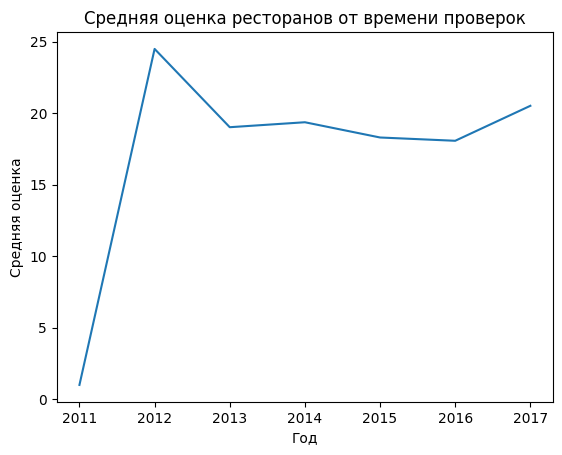

In [13]:
# Выборка 4: Постройте line chart зависимости среднего рейтинга ресторанов от времени.

# Группировка данных по году и расчет среднего рейтинга
avg_scores_by_year = df.groupby(df['inspection date'].dt.year)['score'].mean()

# Построение line chart
avg_scores_by_year.plot(kind='line')
plt.xlabel('Год')
plt.ylabel('Средняя оценка')
plt.title('Средняя оценка ресторанов от времени проверок')
plt.show()


P.s Данные за 2011 год можно не учитывать, так как записей за него всего две (это ничтожно мало и только вредит)

In [14]:
df[df['inspection date'].dt.year == 2011]

,camis,dba,boro,building,street,zipcode,phone,cuisine description,inspection date,action,violation code,violation description,critical flag,score,grade,grade date,record date,inspection type
163556,41611669,SMOKING TERECE,QUEENS,110-00,ROCKAWAY BOULEVARD,11420.0,7182153308,"Bottled beverages, including water, sodas, jui...",2011-10-07,Violations were cited in the following area(s).,10J,''''Wash hands sign not posted at hand wash f...,Not Critical,2.0,NaN,NaN,2017-08-28,Pre-permit (Non-operational) / Initial Inspection
343394,41606183,BEDFORD FUSION CAFE,BROOKLYN,197,BEDFORD AVENUE,11211.0,6467080446,Asian,2011-12-30,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0.0,NaN,NaN,2017-08-28,Pre-permit (Non-operational) / Initial Inspection


## 5


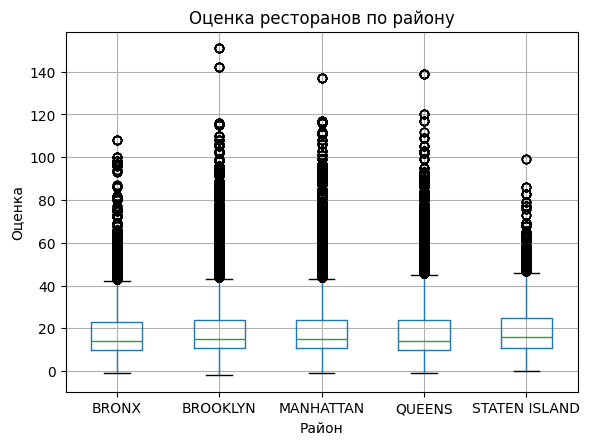

In [15]:
# Выборка 5: С помощью box plot сравните распределение оценок ресторанов, расположенных в разных районах.

# Построения boxplot
df.boxplot(column='score', by='boro')
plt.xlabel('Район')
plt.ylabel('Оценка')
plt.title('Оценка ресторанов по району')
plt.suptitle('')
plt.show()

## 6



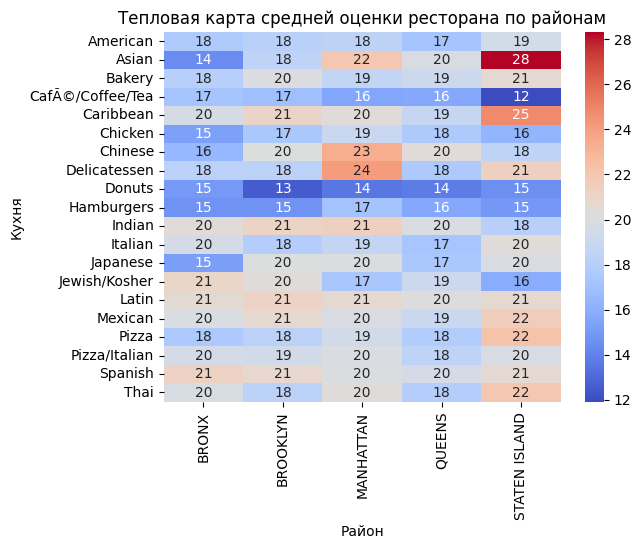

In [16]:
# Выборка 6: Создайте тепловую карту (heatmap) зависимости оценки ресторана от типа кухни и района.

#Возьмем только топ 20 видов кухонь, так как их слишко много
cuisine_counts = df['cuisine description'].value_counts().head(20)
cuisine_top_counts = cuisine_counts.index.tolist()
temp_df = df[df['cuisine description'].isin(cuisine_top_counts)]

# Создание сводной таблицы
pivot_table = temp_df.pivot_table(values='score', index='cuisine description', columns='boro', aggfunc='mean')

# Построение тепловой карты
sns.heatmap(pivot_table, cmap='coolwarm', annot=True)
plt.xlabel('Район')
plt.ylabel('Кухня')
plt.title('Тепловая карта средней оценки ресторана по районам')
plt.show()


## 7


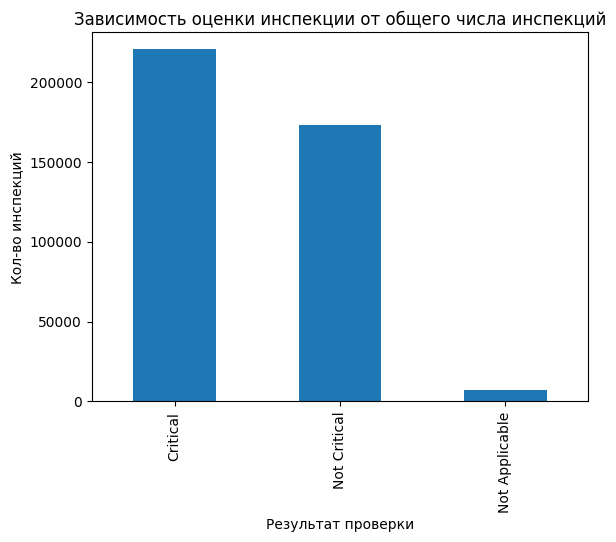

In [17]:
# Выборка 7: Постройте bar chart, сравнивающий количество ресторанов, инспектированных с разными результатами. 
# Корректнее считать кол-во инспекций и к каким результатам они привели

# Группировка данных по результатам инспекции
result_counts = df['critical flag'].value_counts()
# Построение bar chart
result_counts.plot(kind='bar')
plt.xlabel('Результат проверки')
plt.ylabel('Кол-во инспекций')
plt.title('Зависимость оценки инспекции от общего числа инспекций')
plt.show()


## 8


In [18]:
# Выборка 8: С помощью scatter plot визуализируйте зависимость оценки ресторана от количества нарушений.

в точности №3

## 9


In [21]:
# Выборка 9: Создайте карту, отображающую количество ресторанов в разных районах Нью-Йорка.

#Кол-во ресторанов по районам и по коду (повторяющиеся коды склеиваются)
borough_counts = df.groupby(['boro'])['camis'].nunique()

# Создание карты
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

#Геоданные
locations = {
    'BRONX': [40.82759731456553, -73.90654192980843],
    'MANHATTAN': [40.76182261353115, -73.98152554163758],
    'BROOKLYN': [40.645311141825836, -73.95045756539682],
    'QUEENS': [40.71442138576018, -73.82992316133488],
    'STATEN ISLAND': [40.603857162374375, -74.11700994930406]
}

# Добавление маркеров на карту
marker_cluster = MarkerCluster().add_to(nyc_map)
for borough, count in borough_counts.items():
    folium.Marker(location=locations[borough], popup=f'{borough}: {count} restaurants').add_to(marker_cluster)

# Отображение карты
nyc_map


## 10


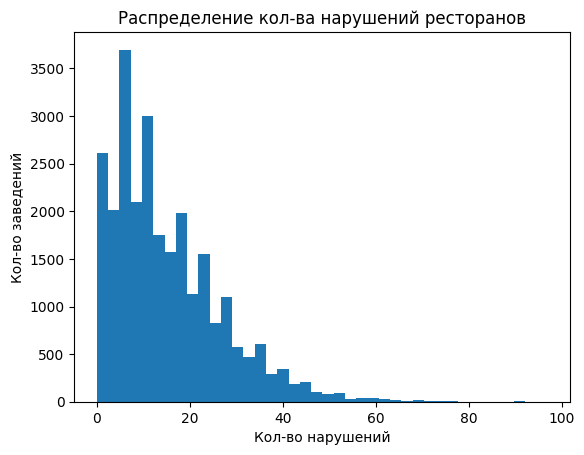

In [20]:
# Выборка 10: Постройте гистограмму распределения количества нарушений ресторанов.
    
# Группировка по ресторанам
violation_count = df.groupby(['camis']).agg({'dba':'count'})

# Построение гистограммы
plt.hist(violation_count['dba'], bins=40)
plt.xlabel('Кол-во нарушений')
plt.ylabel('Кол-во заведений')
plt.title('Распределение кол-ва нарушений ресторанов')
plt.show()